### Import packages

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load the Data

In [101]:
data = pd.read_csv("C:/Users/krish/Data Science Projects/Task-4/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [102]:
train = pd.read_csv('C:/Users/krish/Data Science Projects/Task-4/Advertising.csv', index_col='TV', parse_dates = True)
train.head()

,Unnamed: 0,Radio,Newspaper,Sales
TV,,,,
230.1,1,37.8,69.2,22.1
44.5,2,39.3,45.1,10.4
17.2,3,45.9,69.3,9.3
151.5,4,41.3,58.5,18.5
180.8,5,10.8,58.4,12.9


In [103]:
print(data.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [105]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### heatmap

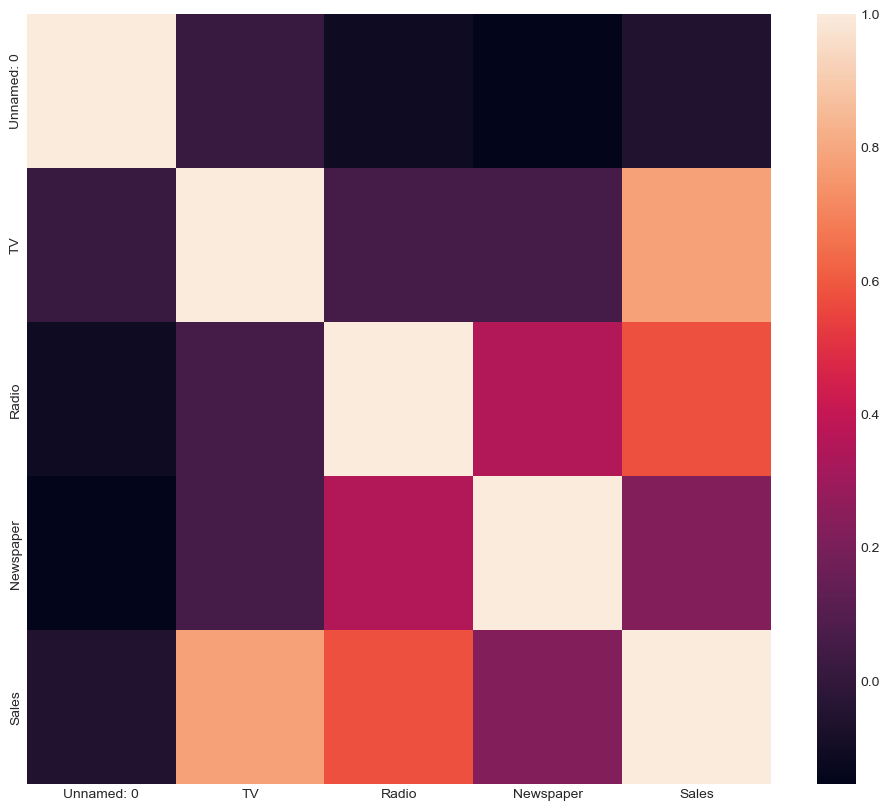

In [106]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

### Histogram

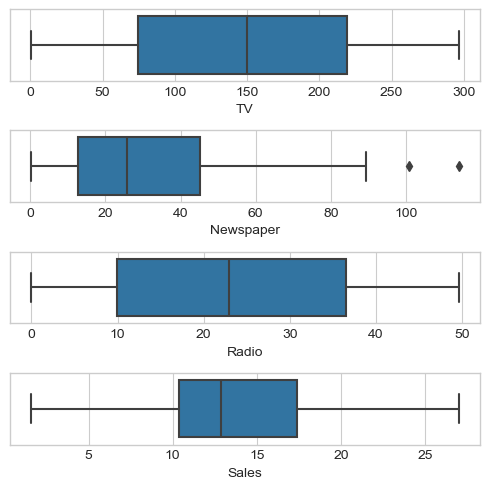

In [107]:
fig,axs = plt.subplots(4,figsize = (5,5))
plt1 = sns.boxplot(data['TV'],ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'],ax = axs[1])
plt3 = sns.boxplot(data['Radio'],ax = axs[2])
plt4 = sns.boxplot(data['Sales'],ax = axs[3])
plt.tight_layout()

<AxesSubplot:xlabel='TV', ylabel='Density'>

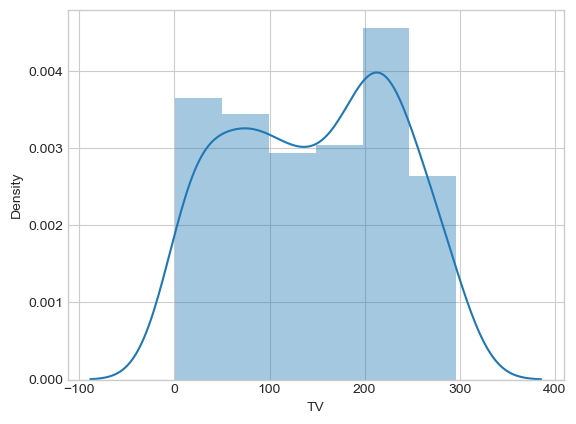

In [108]:
sns.distplot(data['TV'])

In [109]:
iqr = data.TV.quantile(0.75) - data.TV.quantile(0.25)

In [110]:
lower_bridge = data["TV"].quantile(0.25) -(iqr*1.5)
upper_bridge = data["TV"].quantile(0.75) -(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-142.29999999999998
2.1500000000000057


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

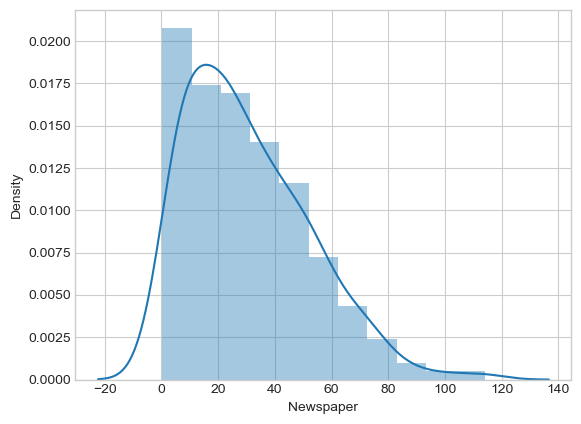

In [111]:
sns.distplot(data['Newspaper'])

In [112]:
iqr = data.Newspaper.quantile(0.75) - data.Newspaper.quantile(0.25)

In [113]:
lower_bridge = data["Newspaper"].quantile(0.25) -(iqr*1.5)
upper_bridge = data["Newspaper"].quantile(0.75) -(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
-3.4250000000000043


<AxesSubplot:xlabel='Radio', ylabel='Density'>

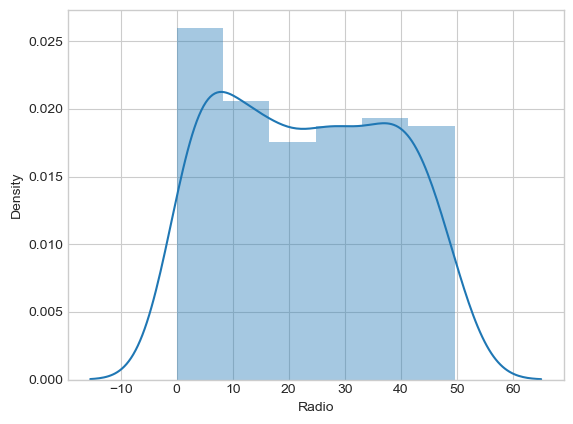

In [114]:
sns.distplot(data['Radio'])

In [115]:
iqr = data.Radio.quantile(0.75) - data.Radio.quantile(0.25)

In [116]:
lower_bridge = data["Radio"].quantile(0.25) -(iqr*1.5)
upper_bridge = data["Radio"].quantile(0.75) -(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-29.849999999999994
-3.299999999999997


<AxesSubplot:xlabel='Sales', ylabel='Density'>

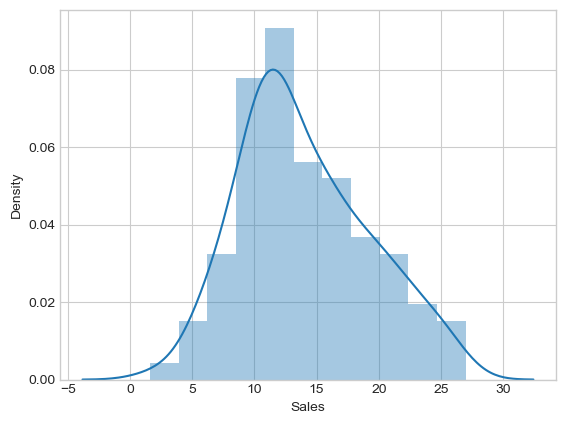

In [117]:
sns.distplot(data['Sales'])

In [118]:
iqr = data.Sales.quantile(0.75) - data.Sales.quantile(0.25)

In [119]:
lower_bridge = data["Sales"].quantile(0.25) -(iqr*1.5)
upper_bridge = data["Sales"].quantile(0.75) -(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-0.16249999999999787
6.862500000000001


### Box-Plot

In [120]:
data =data.copy()

In [121]:
data.loc[data['Newspaper']>=93 ,'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

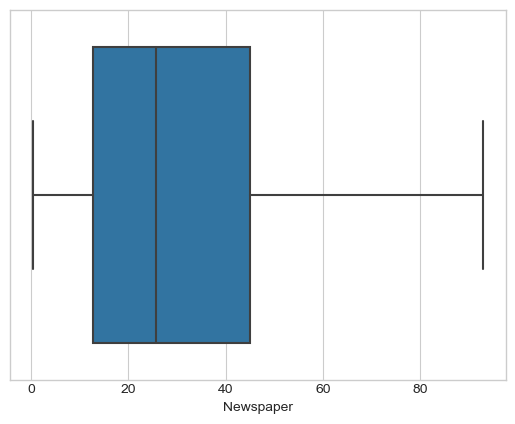

In [122]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

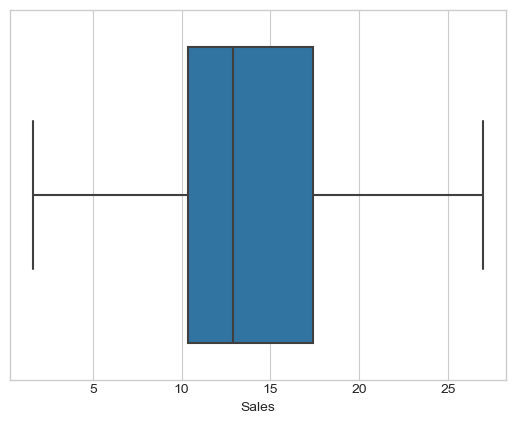

In [123]:
sns.boxplot(data['Sales'])

<AxesSubplot:xlabel='TV'>

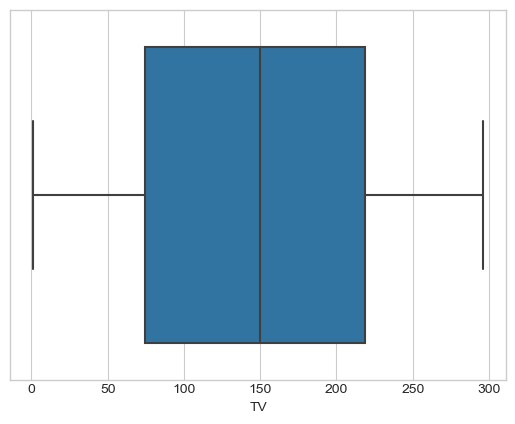

In [124]:
sns.boxplot(data['TV'])

<AxesSubplot:xlabel='Radio'>

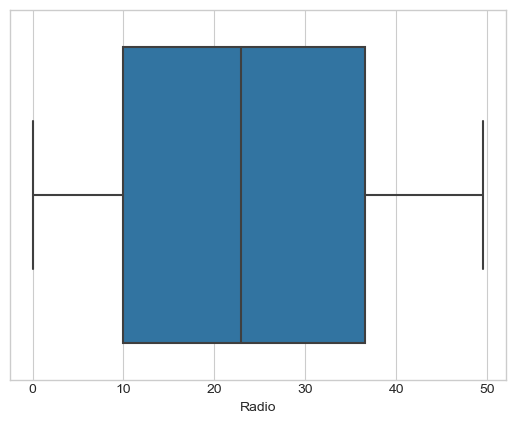

In [125]:
sns.boxplot(data['Radio'])

### Pair Plot

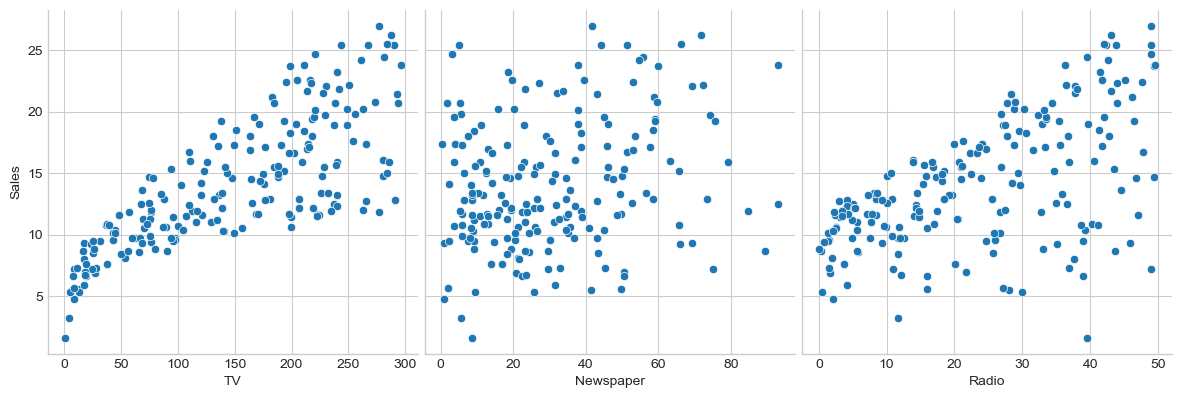

In [126]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
            y_vars = 'Sales',height = 4,aspect=1,kind='scatter')
plt.show()

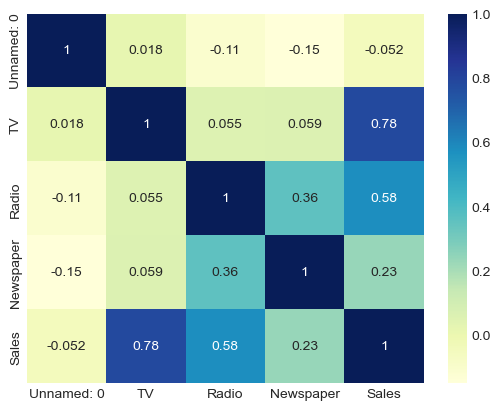

In [127]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [128]:
important_features = list(data.corr()['Sales'][(data.corr()['Sales']>+0.5)|(data.corr()['Sales']<-0.5)].index)

In [129]:
print(important_features)

['TV', 'Radio', 'Sales']


In [130]:
x= data['TV']
y = data['Sales']

In [131]:
x= x.values.reshape(-1,1)

In [132]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [133]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [134]:
print(x.shape,y.shape)

(200, 1) (200,)


### Test and train the data

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [136]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [160]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [179]:
knn = KNeighborsRegressor().fit(x_train,y_train)
print(knn)

KNeighborsRegressor()


In [162]:
knn_train_pred = knn.predict(x_train)

In [163]:
knn_test_pred = knn.predict(x_test)

In [164]:
print(knn_train_pred,knn_test_pred)

[11.24 17.66 16.34 17.66  9.7  13.48 10.74  9.98 10.66 22.56  9.6  19.16
 11.36 14.36 15.    9.94 17.86  4.26 16.2   9.92 19.88 19.16 22.22 14.36
 19.16 18.9  18.82  7.38 19.48 16.34  8.34 14.46 18.24 15.2  20.82 11.34
 13.7  17.86 10.74 21.4   5.38 18.82 17.54 16.2  10.96 21.4   8.34  7.38
 18.54 12.98 16.44 16.28 16.2  18.24 15.28 17.46 12.84 18.3  13.7  13.7
 13.48 18.1  14.22 16.28  7.38  9.94 17.18 17.44 11.   20.78 21.56  4.26
 14.46 11.52 11.34 10.5  19.88 15.2  18.3  13.48  9.7   5.38 15.6  18.24
  6.68 18.1  20.62 14.66 14.66 15.9  10.66 14.2  15.28  9.98 13.36 20.78
 10.66 16.34 11.24 14.2   7.84 13.78 18.72 22.56 17.66  8.34  9.94 21.44
  9.98 16.34 11.2   7.38 14.2  11.36  8.8  19.68 13.94 16.2  22.22 13.78
 17.54 14.58 18.54 16.28 10.96 13.68  5.8  10.66  9.96  7.38 12.78  5.38
 13.06 14.7 ] [10.66  7.84 16.2   5.38 23.3  10.66  7.14 15.38 20.62 11.2  11.36 18.82
  7.38 17.48 17.86 18.24 13.36 19.48 14.84 14.28 12.78  7.84 22.22 11.2
  7.38 11.   14.7  11.   10.5  10.48 11

In [171]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2"])

In [172]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
variance =r2_train-r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"variance":variance},ignore_index=True)
print("R2:",r2)

R2: 0.3537358325112354


In [173]:
Results.head()

,Model,Train R2,Test R2,variance
0,K-Nearest Neighbors,0.726444,0.353736,0.372708


In [178]:
svr =SVR().fit(x_train,y_train)
print(svr)

SVR()


In [182]:
svr_train_pred= svr.predict(x_train) 
svr_test_pred = svr.predict(x_test)

In [183]:
print(svr_train_pred,svr_test_pred)

[12.02321422 19.70764715 16.42122013 19.69348018  9.14760547 12.28111895
 10.45592562  9.90937988 11.07356605 19.55045444 10.02205667 19.70218672
 11.82332449 15.04737031 12.9500339   8.89430763 17.79733857  7.81941487
 18.38032745  8.841641   17.58037848 19.66555047 19.4512032  15.04737031
 19.69443956 17.66392965 18.92944168  8.07999849 17.38520929 15.9105595
  8.42941649 13.00846847 18.83928923 16.95470241 19.74038283 11.39349835
 14.32561569 17.84133593 10.40902659 19.00224704  7.8904305  18.92013831
 15.51927853 18.16537673 11.69076964 19.06782052  8.47364087  8.09967224
 16.33510505 14.5744849  16.66090435 18.05726944 18.29443444 18.80017003
 17.13442    19.65597615 12.09376914 17.71499118 14.37517848 14.43042333
 12.28111895 19.49545302 13.43405675 15.70660951  8.07999849  8.96733602
 15.37851288 16.07895183 10.83660006 19.36067924 19.70728939  7.83937174
 13.02921357 11.53218199 11.32684932  9.21934043 17.60615912 16.94803169
 17.70862404 12.31280564  9.1425133   7.87467064 15.

In [184]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
variance =r2_train-r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"variance":variance},ignore_index=True)
print("R2:",r2)

R2: 0.46809907577401466


In [185]:
Results.head()

,Model,Train R2,Test R2,variance
0,K-Nearest Neighbors,0.726444,0.353736,0.372708
1,Support Vector Machine,0.650159,0.468099,0.182060


In [186]:
import statsmodels.api as sm

In [187]:
x_train_constant = sm.add_constant(x_train)

In [188]:
model = sm.OLS(y_train,x_train_constant).fit()

In [189]:
model.params

const    6.679111
x1       0.050764
dtype: float64

In [190]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     268.8
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.23e-33
Time:                        17:35:04   Log-Likelihood:                -339.95
No. Observations:                 134   AIC:                             683.9
Df Residuals:                     132   BIC:                             689.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6791      0.536     12.450      0.0

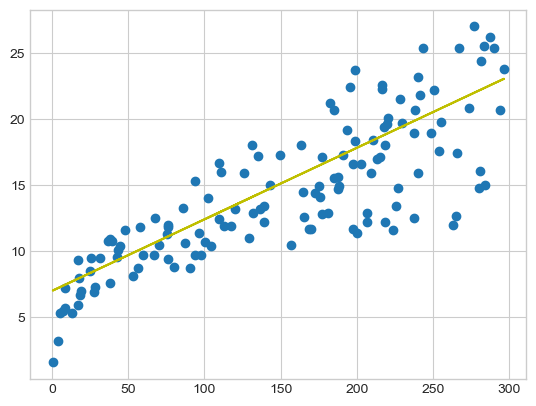

In [191]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [192]:
y_train_pred = model.predict(x_train_constant)
res =(y_train-y_train_pred)
print(res)

63     2.107382
36     5.171864
55     6.923845
33    -2.762142
38     1.232942
         ...   
189   -0.928406
7      0.419005
78    -1.653239
177   -3.619216
99     3.657539
Name: Sales, Length: 134, dtype: float64


In [193]:
y_train_pred

array([11.89261754, 20.22813579, 16.77615503, 20.16214204,  8.86705793,
       12.25304495, 10.12093918,  9.59806562, 10.75041803, 21.38556464,
        9.70467091, 20.92868483, 11.62864254, 15.66441417, 13.24802764,
        8.60815938, 17.83713147,  6.7146464 , 18.32954638,  8.55231851,
       17.66453243, 21.07590166, 21.58354589, 15.66441417, 20.96421993,
       17.73052618, 18.86764926,  7.55225938, 17.51223917, 16.38019253,
        8.07513293, 13.33432715, 18.77119686, 17.18227042, 20.57333387,
       11.10576899, 14.97909446, 17.87266657, 10.0752512 , 18.94887234,
        7.10553246, 18.85749637, 16.06545311, 18.14171801, 11.46111995,
       19.02501897,  8.1309738 ,  7.58779447, 16.71016128, 15.22784013,
       16.95890695, 18.05034205, 18.25339974, 18.73058532, 17.31933436,
       20.0250781 , 11.98906995, 17.77113772, 15.02985888, 15.08569975,
       12.25304495, 19.64434493, 13.93334735, 16.21774638,  7.55225938,
        8.68430601, 15.94869494, 16.51218003, 10.50167235, 19.41

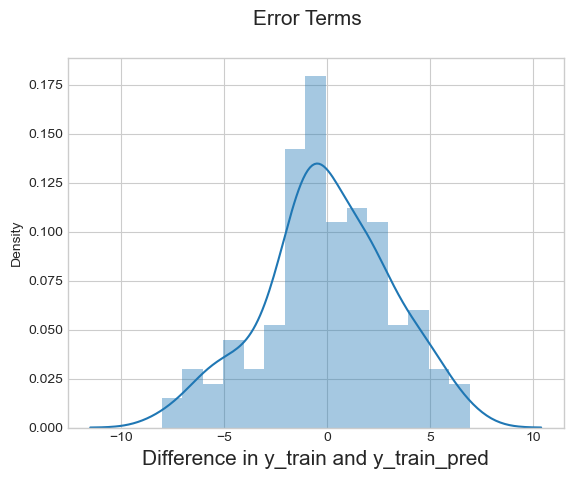

In [195]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms',fontsize =15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize =15)
plt.show()

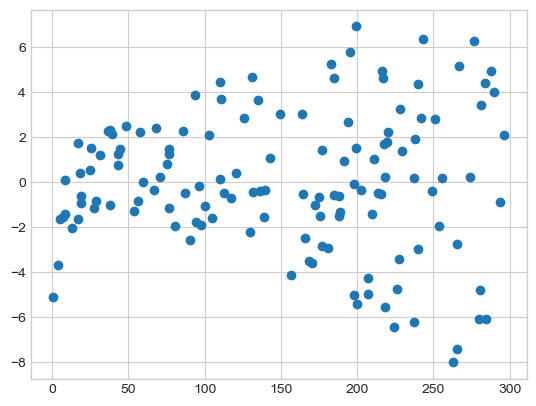

In [196]:
plt.scatter(x_train,res)
plt.show()

In [197]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [198]:
y_pred

array([10.64888918,  7.88730457, 18.26862907,  7.11568534, 21.19773627,
       10.51182524,  7.34920169, 17.96911897, 20.72562714, 10.18185649,
       11.53726658, 18.85241993,  7.67409399, 18.46153387, 17.86251368,
       18.82703772, 15.37505696, 17.51731561, 14.36992138, 17.04013003,
       12.79622427,  7.94822188, 21.43632906, 10.15139783,  7.66394111,
       10.4712137 , 13.49677331, 10.40521995,  8.94828101,  9.84173485,
       10.19200937, 14.28362186, 11.23268004, 12.56778437, 12.92821177,
        7.0750738 ,  9.21733245, 13.67952523, 12.13121033, 10.49151947,
       21.54801079, 18.58336849, 14.96894157, 16.48679782, 10.03463966,
       17.08581801,  7.27305505,  8.03959784,  7.53703005, 20.01492522,
       13.80135985, 11.16160985, 11.61341322, 19.94385503, 19.28899397,
       13.85212427, 13.76074831, 17.96911897, 17.57823292, 12.82160648,
       15.14661705, 18.86764926, 17.38025167, 16.82184301, 18.36000503,
       14.15671081])

In [209]:
r2 = r2_score(y_test,y_pred)
print(r2)


0.4497059544857416


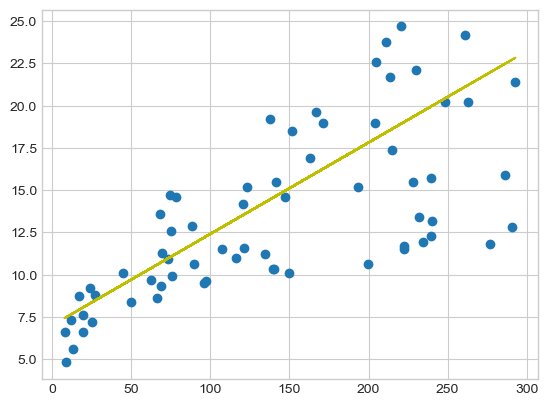

In [211]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()